In [1]:
import garpar as gp
import itertools as it
import numpy as np
import joblib as jb
import tqdm.notebook
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns

## Parámetros de la Levy desde una muestra aleatoria

In [2]:
x = scipy.stats.levy_stable.rvs(alpha=2.0, beta=-0.0126, loc=0.0005, scale=0.005, size=100)
alpha1, beta1, loc1, scale1 = scipy.stats.levy_stable.fit(x)
alpha1, beta1, loc1, scale1


(1.9999984435952447,
 -0.49651358600074247,
 0.001057833438380435,
 0.005331281405650185)

## Parámetros de Levy desde un año de Mercado Valores Argentino 

In [3]:
merval21 = gp.datasets.load_MERVAL(
    first="01-02-2021", last = "12-31-2021")
merval21 = merval21.as_returns()
merval21

Stocks,ALUA,BBAR,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,HARG,...,MOLA,MOLI,MORI,OEST,PATA,POLL,RIGO,SAMI,SEMI,TGLT
Days,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.056995,-0.014122,-0.003331,0.039242,0.004132,0.027451,0.020047,-0.012456,0.003245,0.016598,...,0.028148,0.006873,0.046358,-0.001789,0.021505,0.076503,0.000000,0.000000,-0.010889,-0.006061
2021-01-06,0.035294,-0.012325,0.008354,-0.026042,0.008230,0.013740,0.035838,-0.007207,-0.004852,0.016327,...,0.011527,-0.010239,-0.006329,-0.017921,-0.026316,0.000000,0.015385,0.008475,0.023853,0.006098
2021-01-07,0.005682,-0.015514,-0.000829,-0.005348,-0.004082,0.038404,0.001116,-0.014519,0.006908,-0.006024,...,0.001425,-0.006897,0.054140,0.000000,0.000000,0.000000,0.030303,0.000000,0.109319,-0.012121
2021-01-08,0.005650,-0.002398,-0.000829,-0.013441,-0.012295,-0.015228,-0.125975,-0.009208,-0.010089,-0.004040,...,-0.001422,0.005787,-0.012085,-0.023723,-0.005405,0.000000,-0.011029,0.008403,-0.046850,-0.053170
2021-01-11,0.007491,-0.050137,-0.004149,-0.016349,-0.004149,0.002946,-0.019133,-0.040892,-0.019568,-0.012170,...,-0.027066,-0.016110,-0.024465,-0.009346,0.000000,-0.005076,-0.011152,0.008333,0.033898,0.010799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.024202,0.020322,0.031205,0.029366,0.001681,0.000996,0.021193,0.024510,0.003778,0.004280,...,0.016570,0.012295,-0.024922,0.048493,0.056319,0.000000,-0.006579,-0.001786,0.005025,0.008021
2021-12-27,-0.008593,0.019689,-0.017691,-0.010511,0.028523,-0.056716,-0.039969,0.029665,0.004266,-0.036932,...,0.029956,0.000000,0.012780,0.018750,-0.016905,-0.024299,0.000000,0.016100,0.000000,-0.013263
2021-12-28,-0.050921,-0.049394,-0.032227,-0.042489,0.001631,0.007911,-0.013611,-0.036245,-0.034733,-0.022124,...,0.028229,0.004049,0.000000,-0.019632,-0.010582,-0.007663,0.000000,-0.019366,0.001667,0.008065


In [4]:
y21 = merval21.mean(axis = 0, skipna = True)
y21

Stocks
ALUA     0.003034
BBAR     0.002111
BYMA     0.002487
CEPU     0.002874
COME     0.004394
CRES     0.002372
CVH      0.001886
EDN      0.003411
GGAL     0.002302
HARG     0.001710
MIRG     0.003881
PAMP     0.003631
SUPV     0.001665
TECO2    0.000576
TGNO4    0.003871
TGSU2    0.001023
TRAN     0.002961
TXAR     0.004134
YPFD     0.001129
AGRO     0.003768
AUSO     0.002325
BHIP    -0.000061
BOLT     0.000204
BPAT     0.000955
CADO     0.001365
CELU     0.000092
CGPA2    0.003669
DGCU2    0.003301
DYCA     0.002574
FERR     0.001701
FIPL     0.003082
GARO     0.004311
GBAN     0.003884
GCLA     0.005292
GRIM     0.005866
HAVA     0.001192
INVJ     0.000855
IRCP    -0.000682
IRSA     0.001648
LEDE     0.003289
LONG     0.001845
METR     0.003418
MOLA     0.002690
MOLI     0.001669
MORI     0.000382
OEST     0.001820
PATA     0.000346
POLL     0.005035
RIGO     0.000950
SAMI     0.001134
SEMI     0.000623
TGLT    -0.000923
dtype: float64

In [5]:
y21 = merval21.mean(axis = 0, skipna = True) 
alpha1, beta1, loc1, scale1 = scipy.stats.levy_stable.fit(y21)
alpha1, beta1, loc1, scale1

(2.0, 1.0, 0.0022513892259879527, 0.001210912700436551)

In [6]:
# definimos los sectores 
come = ["AUSO", "BOLT", "DYCA","GCLA", "IRCP", "IRSA", "OEST", "PATA", "POLL","TECO2","CVH"] 
moa = ["CELU", "GRIM", "HAVA", "LEDE", "MOLA", "MOLI", "MORI", "SAMI", "SEMI"] #"INTR"
moi = ["AGRO", "ALUA",  "FERR", "LONG", "RIGO", "HARG", "FIPL"] # "ROSE", "LOMA", "CAPU","MIRG","TXAR "
agro = ["CADO", "GARO", "INVJ","CRES"] #"ESME"
ene = ["CEPU", "CGPA2", "DGCU2", "GBAN", "METR", "TGNO4", "TGSU2", "YPFD", "PAMP","TRAN","COME","EDN","GBAN" ]  #"CARC",
fin = ["BHIP", "BPAT",  "BYMA", "GGAL", "SUPV", "BBAR"] #"BMA", "VALO", "BRIO","BRIO6",

In [7]:
y21scome = merval21[come].mean(axis = 1, skipna = True) 
alpha_come, beta_come, loc_come, scale_come = scipy.stats.levy_stable.fit(y21scome)
alpha_come, beta_come, loc_come, scale_come 

(1.8190316218403773,
 0.4503142299590916,
 0.0021742929768565605,
 0.00834763566037715)

In [41]:
ktestcom = scipy.stats.ks_1samp(x=y21scome, cdf=scipy.stats.levy_stable.cdf, args=(alpha_come, beta_come, loc_come, scale_come ))
ktestcom

KstestResult(statistic=0.025461714825871007, pvalue=0.9967036546261379, statistic_location=0.010164345043233804, statistic_sign=1)

In [50]:
y21smoa = merval21[moa].mean(axis = 1, skipna = True) 
alphamoa, betamoa, locmoa, scalemoa = scipy.stats.levy_stable.fit(y21smoa)
alphamoa, betamoa, locmoa, scalemoa

(1.9999999999999991,
 -0.9999999999999998,
 0.0021527853033436115,
 0.007323718974539857)

In [40]:
ktestmoa = scipy.stats.ks_1samp(x=y21smoa, cdf=scipy.stats.levy_stable.cdf, args=(alphamoa, betamoa, locmoa, scalemoa))
ktestmoa

KstestResult(statistic=0.052755722594221455, pvalue=0.49962670806675147, statistic_location=0.010466055474004933, statistic_sign=1)

In [11]:
y21smoi = merval21[moi].mean(axis = 1, skipna = True) 
alphamoi, betamoi, locmoi, scalemoi = scipy.stats.levy_stable.fit(y21smoi)
alphamoi, betamoi, locmoi, scalemoi

(2.0, 1.0, 0.002861928175619074, 0.00888794710133814)

In [39]:
ktestmoi=scipy.stats.ks_1samp(x=y21smoi, cdf=scipy.stats.levy_stable.cdf, args=(alphamoi, betamoi, locmoi, scalemoi))
ktestmoi

KstestResult(statistic=0.03591666575291125, pvalue=0.9050647533708039, statistic_location=-0.006053012350894235, statistic_sign=1)

In [13]:
y21sagro = merval21[agro].mean(axis = 1, skipna = True) 
alphaagro, betaagro, locagro, scaleagro = scipy.stats.levy_stable.fit(y21sagro)
alphaagro, betaagro, locagro, scaleagro

(1.7918750041895795,
 0.23881535080290872,
 0.002009024615225637,
 0.009778580052196851)

In [38]:
ktestagro =scipy.stats.ks_1samp(x=y21sagro, cdf=scipy.stats.levy_stable.cdf, args=(alphaagro, betaagro, locagro, scaleagro))
ktestagro 

KstestResult(statistic=0.039353973656518826, pvalue=0.8367294853450916, statistic_location=0.0020767034590011, statistic_sign=-1)

In [15]:
y21sene = merval21[ene].mean(axis = 1, skipna = True) 
alphaene, betaene, locene, scaleene = scipy.stats.levy_stable.fit(y21sene)
alphaene, betaene, locene, scaleene

(1.7421799494474097,
 0.4759121392451602,
 0.0035093258371752126,
 0.011599771620047423)

In [36]:
ktestene= scipy.stats.ks_1samp(x=y21sene, cdf=scipy.stats.levy_stable.cdf, args=(alphaene, betaene, locene, scaleene))
ktestene

KstestResult(statistic=0.03572499502454479, pvalue=0.9083627613731279, statistic_location=-0.010949555441387785, statistic_sign=-1)

In [17]:
y21sfin = merval21[fin].mean(axis = 1, skipna = True) 
alphafin, betafin, locfin, scalefin = scipy.stats.levy_stable.fit(y21sfin)
alphafin, betafin, locfin, scalefin

(1.8630914086054906,
 0.3745869387265307,
 0.0017691490461231897,
 0.012737154151075864)

In [33]:
ktestfin=scipy.stats.ks_1samp(x=y21sfin, cdf=scipy.stats.levy_stable.cdf, args=(alphafin, betafin, locfin, scalefin))
ktestfin

KstestResult(statistic=0.04049794063373313, pvalue=0.8107162618149142, statistic_location=-0.0035419046569829526, statistic_sign=1)

In [19]:
y21s = merval21.mean(axis = 1, skipna = True) 
alphat, betat, loct, scalet = scipy.stats.levy_stable.fit(y21s)
alphat, betat, loct, scalet

(1.8128170393712963,
 0.3392396471308702,
 0.002412045077898315,
 0.007927153418948544)

In [25]:
ktestt= scipy.stats.ks_1samp(x=y21s, cdf=scipy.stats.levy_stable.cdf, args=(alphat, betat, loct, scalet))
ktestt

KstestResult(statistic=0.03837006964829409, pvalue=0.8579258105755009, statistic_location=-0.002157593522697817, statistic_sign=1)

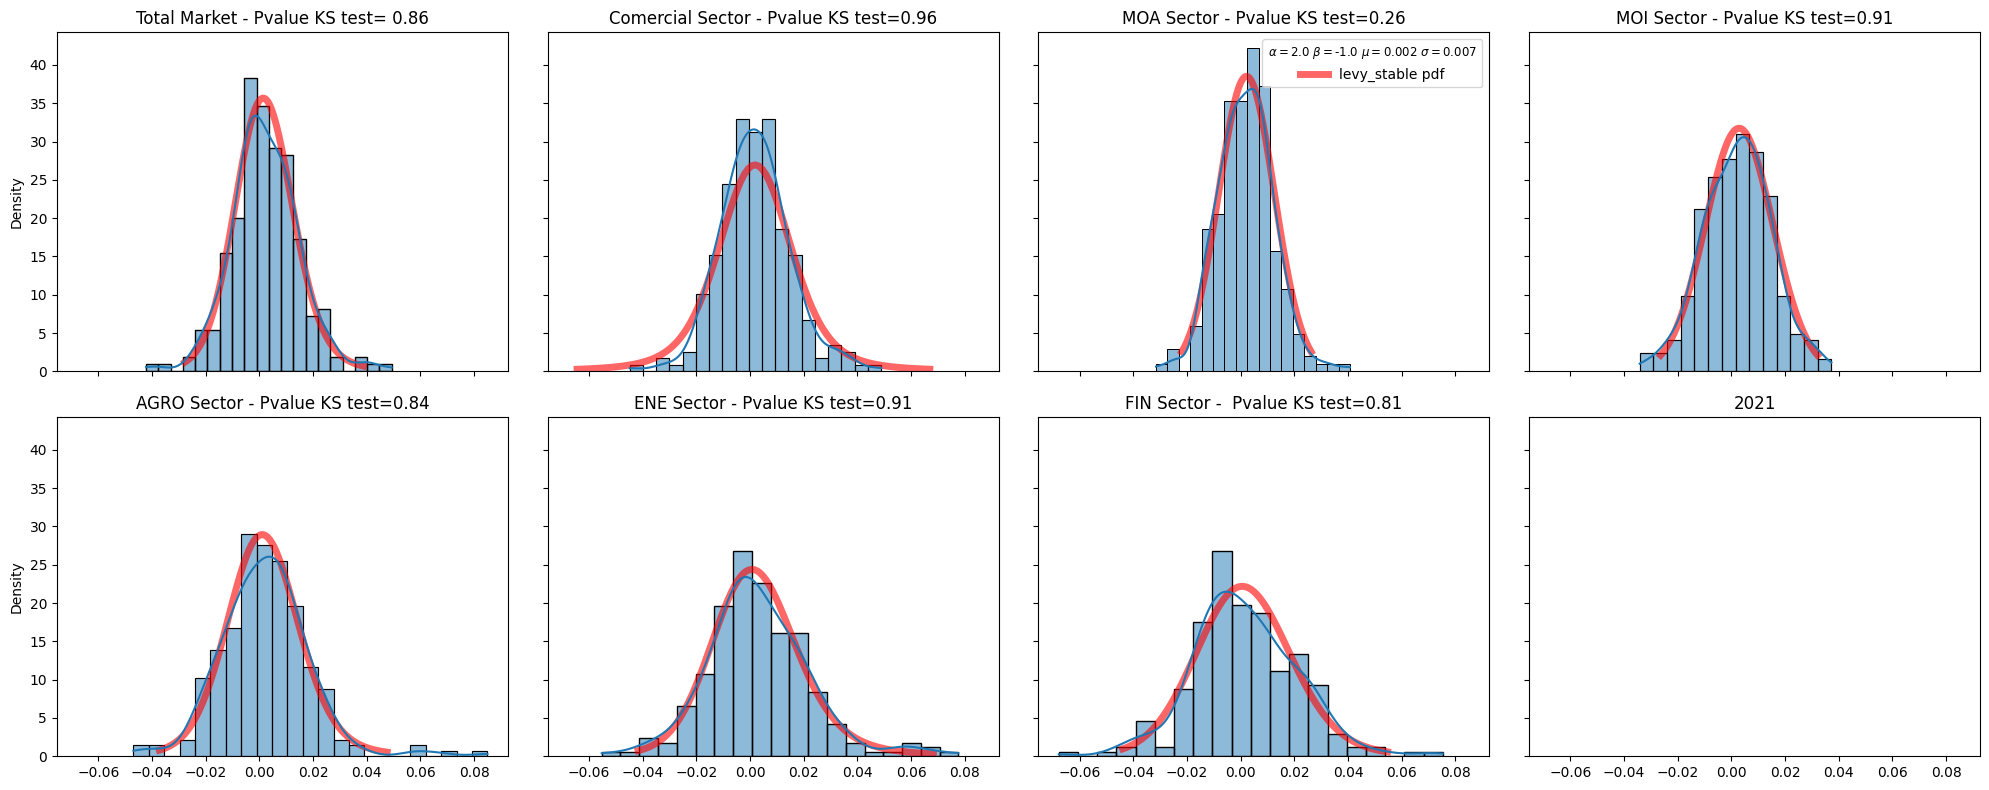

In [78]:
fig, ax = plt.subplots(2, 4, sharey=True, sharex=True)
fig.set_size_inches(20, 8)
#todo
alpha, beta, loc, scale = alphat, betat, loct, scalet
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,0],data=y21s,stat = "density",kde=True)
ax[0,0].set_title(f"Total Market - Pvalue KS test= {ktestt.pvalue:.2f}")
#come
alpha, beta, loc, scale = alpha_come, beta_come, loc_come, scale_come 
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,1],data=y21scome, stat = "density",kde=True)
ax[0,1].set_title(f"Comercial Sector - Pvalue KS test={ktestcom.pvalue:.2f}")
#moa
alpha, beta, loc, scale = alphamoa, betamoa, locmoa, scalemoa
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,2],data=y21smoa, stat = "density",kde=True)
ax[0,2].set_title(f"MOA Sector - Pvalue KS test={ktestmoa.pvalue:.2f}")
ax[0,2].legend(title=fr"$
               \alpha=${alphamoa:.1f} $\beta=${betamoa:.1f} $\mu=${locmoa:.3f} $\sigma=${scalemoa:.3f}", title_fontsize = "8.5")

#moi
alpha, beta, loc, scale = alphamoi, betamoi, locmoi, scalemoi
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,3].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,3],data=y21smoi, stat = "density",kde=True)
ax[0,3].set_title(f"MOI Sector - Pvalue KS test={ktestmoi.pvalue:.2f}" )
#agro
alpha, beta, loc, scale = alphaagro, betaagro, locagro, scaleagro
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,0],data=y21sagro, stat = "density",kde=True)
ax[1,0].set_title(f"AGRO Sector - Pvalue KS test={ktestagro.pvalue:.2f}")
#ene
alpha, beta, loc, scale = alphaene, betaene, locene, scaleene
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,1],data=y21sene, stat = "density",kde=True)
ax[1,1].set_title(f"ENE Sector - Pvalue KS test={ktestene.pvalue:.2f}")

#FIN
alpha, beta, loc, scale = alphafin, betafin, locfin, scalefin
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,2],data=y21sfin, stat = "density",kde=True)
ax[1,2].set_title(f"FIN Sector -  Pvalue KS test={ktestfin.pvalue:.2f}")
ax[1,3].set_title("2021")
fig.tight_layout()


# blue line is empirical data and red line is teorical data of the goodness fit

Año 21    | Total                | Comercial              | MOA                   | MOI                     | AGRO                    | ENE                     | FIN                     |
|-------|------------------------|------------------------|-----------------------|-------------------------|-------------------------|-------------------------|-------------------------|
| alpha | 1.8128170393712963     | 1.7808811279069312     | 1.9999999999999991    | 1.949136710901894       |1.7596575607314175       |1.7053902636562444       |1.7153474968904008       |
| beta  | 0.3392396471308702     | 0.3534688249115768     | -0.9999999999999998   |  0.5278039611512102     |0.31821908297498924      |0.7742516124473384       |0.431775605826474        |
| loc   |0.002412045077898315    | 0.0023534096696979723  | 0.0021527853033436115 |  0.0021583577265823204  | 0.0018117626731931988   |0.0040621444390737185    |0.0007622504126380711    |
| scale | 0.007927153418948544   |  0.008182377166796722  | 0.007323718974539857  | 0.009352974587930479    | 0.008511457165211928    |0.012050605736389379     |0.008937680565895539     |


In [43]:
merval20 = gp.datasets.load_MERVAL(
    first="01-02-2020", last = "12-31-2020")
merval20 = merval20.as_returns()



In [44]:
y20scome = merval20[come].mean(axis = 1, skipna = True) 
alpha_come, beta_come, loc_come, scale_come = scipy.stats.levy_stable.fit(y20scome)
alpha_come, beta_come, loc_come, scale_come 

(1.606068031148807,
 -0.014170674070088764,
 0.001753196459273034,
 0.010583759011642931)

In [45]:
ktestcom =scipy.stats.ks_1samp(x=y20scome, cdf=scipy.stats.levy_stable.cdf, args=(alpha_come, beta_come, loc_come, scale_come ))
ktestcom

KstestResult(statistic=0.032354251263514044, pvalue=0.9561381896681697, statistic_location=0.0003141795446120527, statistic_sign=1)

In [46]:
y20smoa = merval20[moa].mean(axis = 1, skipna = True) 
alphamoa, betamoa, locmoa, scalemoa = scipy.stats.levy_stable.fit(y20smoa)
alphamoa, betamoa, locmoa, scalemoa

(1.6336213658969079,
 0.10465851852609709,
 0.00235355697136074,
 0.011398936158531634)

In [47]:
ktestmoa = scipy.stats.ks_1samp(x=y20smoa, cdf=scipy.stats.levy_stable.cdf, args=(alphamoa, betamoa, locmoa, scalemoa))
ktestmoa

KstestResult(statistic=0.06427058628694104, pvalue=0.2632338384016789, statistic_location=0.008727503573810826, statistic_sign=1)

In [ ]:
y20smoi = merval20[moi].mean(axis = 1, skipna = True) 
alphamoi, betamoi, locmoi, scalemoi = scipy.stats.levy_stable.fit(y20smoi)
alphamoi, betamoi, locmoi, scalemoi

In [ ]:
ktestmoi=scipy.stats.ks_1samp(x=y20smoi, cdf=scipy.stats.levy_stable.cdf, args=(alphamoi, betamoi, locmoi, scalemoi))

In [ ]:
y20sagro = merval20[agro].mean(axis = 1, skipna = True) 
alphaagro, betaagro, locagro, scaleagro = scipy.stats.levy_stable.fit(y20sagro)
alphaagro, betaagro, locagro, scaleagro

In [ ]:
scipy.stats.ks_1samp(x=y20sagro, cdf=scipy.stats.levy_stable.cdf, args=(alphaagro, betaagro, locagro, scaleagro))

In [ ]:
y20sene = merval20[ene].mean(axis = 1, skipna = True) 
alphaene, betaene, locene, scaleene = scipy.stats.levy_stable.fit(y20sene)
alphaene, betaene, locene, scaleene

In [ ]:
scipy.stats.ks_1samp(x=y20sene, cdf=scipy.stats.levy_stable.cdf, args=(alphaene, betaene, locene, scaleene))

In [ ]:
y20sfin = merval20[fin].mean(axis = 1, skipna = True) 
alphafin, betafin, locfin, scalefin = scipy.stats.levy_stable.fit(y20sfin)
alphafin, betafin, locfin, scalefin

In [ ]:
scipy.stats.ks_1samp(x=y20sfin, cdf=scipy.stats.levy_stable.cdf, args=(alphafin, betafin, locfin, scalefin))

In [ ]:
y20s = merval20.mean(axis = 1, skipna = True) 
alphat, betat, loct, scalet = scipy.stats.levy_stable.fit(y20s)
alphat, betat, loct, scalet

In [ ]:
scipy.stats.ks_1samp(x=y20s, cdf=scipy.stats.levy_stable.cdf, args=(alphat, betat, loct, scalet))

In [ ]:
fig, ax = plt.subplots(2, 4, sharey=True, sharex=True)
fig.set_size_inches(20, 8)
#todo
alpha, beta, loc, scale = alphat, betat, loct, scalet
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,0],data=y20s,stat = "density",kde=True)
ax[0,0].set_title("Total Market - Pvalue KS test=0.76")
#come
alpha, beta, loc, scale = alpha_come, beta_come, loc_come, scale_come 
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,1],data=y20scome,stat = "density",kde=True)
ax[0,1].set_title("Comercial Sector - Pvalue KS test=0.96")
#moa
alpha, beta, loc, scale = alphamoa, betamoa, locmoa, scalemoa
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,2],data=y20smoa,stat = "density",kde=True)
ax[0,2].set_title("MOA Sector- - Pvalue KS test=0.26")

#moi
alpha, beta, loc, scale = alphamoi, betamoi, locmoi, scalemoi
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,3].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,3],data=y20smoi,stat = "density",kde=True)
ax[0,3].set_title("MOI Sector - Pvalue KS test=0.72")
#agro
alpha, beta, loc, scale = alphaagro, betaagro, locagro, scaleagro
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,0],data=y20sagro,stat = "density",kde=True)
ax[1,0].set_title("AGRO Sector - Pvalue KS test=0.90")
#ene
alpha, beta, loc, scale = alphaene, betaene, locene, scaleene
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,1],data=y20sene,stat = "density",kde=True)
ax[1,1].set_title("ENE Sector - Pvalue KS test=0.81")

#FIN
alpha, beta, loc, scale = alphafin, betafin, locfin, scalefin
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,2],data=y20sfin,stat = "density",kde=True)
ax[1,2].set_title("FIN Sector - Pvalue KS test=0.83")
ax[1,3].set_title("2020")


# blue line is empirical data and red line is teorical data of the goodness fit

In [ ]:
merval19 = gp.datasets.load_MERVAL(
    first="01-02-2019", last = "12-31-2019")
merval19 = merval19.as_returns()


In [ ]:
y19scome = merval19[come].mean(axis = 1, skipna = True) 
alpha_come, beta_come, loc_come, scale_come = scipy.stats.levy_stable.fit(y19scome)
alpha_come, beta_come, loc_come, scale_come 

In [ ]:
scipy.stats.ks_1samp(x=y19scome, cdf=scipy.stats.levy_stable.cdf, args=(alpha_come, beta_come, loc_come, scale_come ))

In [ ]:
y19smoa = merval19[moa].mean(axis = 1, skipna = True) 
alphamoa, betamoa, locmoa, scalemoa = scipy.stats.levy_stable.fit(y19smoa)
alphamoa, betamoa, locmoa, scalemoa

In [ ]:
scipy.stats.ks_1samp(x=y19smoa, cdf=scipy.stats.levy_stable.cdf, args=(alphamoa, betamoa, locmoa, scalemoa))

In [ ]:
y19smoi = merval19[moi].mean(axis = 1, skipna = True) 
alphamoi, betamoi, locmoi, scalemoi = scipy.stats.levy_stable.fit(y19smoi)
alphamoi, betamoi, locmoi, scalemoi

In [ ]:
scipy.stats.ks_1samp(x=y19smoi, cdf=scipy.stats.levy_stable.cdf, args=(alphamoi, betamoi, locmoi, scalemoi))

In [ ]:
y19sagro = merval19[agro].mean(axis = 1, skipna = True) 
alphaagro, betaagro, locagro, scaleagro = scipy.stats.levy_stable.fit(y19sagro)
alphaagro, betaagro, locagro, scaleagro

In [ ]:
scipy.stats.ks_1samp(x=y19sagro, cdf=scipy.stats.levy_stable.cdf, args=(alphaagro, betaagro, locagro, scaleagro))

In [ ]:
y19sene = merval19[ene].mean(axis = 1, skipna = True) 
alphaene, betaene, locene, scaleene = scipy.stats.levy_stable.fit(y19sene)
alphaene, betaene, locene, scaleene

In [ ]:
scipy.stats.ks_1samp(x=y19sene, cdf=scipy.stats.levy_stable.cdf, args=(alphaene, betaene, locene, scaleene))

In [ ]:
y19sfin = merval19[fin].mean(axis = 1, skipna = True) 
alphafin, betafin, locfin, scalefin = scipy.stats.levy_stable.fit(y19sfin)
alphafin, betafin, locfin, scalefin

In [ ]:
scipy.stats.ks_1samp(x=y19sfin, cdf=scipy.stats.levy_stable.cdf, args=(alphafin, betafin, locfin, scalefin))

In [ ]:
y19s = merval19.mean(axis = 1, skipna = True) 
alphat, betat, loct, scalet = scipy.stats.levy_stable.fit(y19s)
alphat, betat, loct, scalet

In [ ]:
merval18 = gp.datasets.load_MERVAL(
    first="01-02-2018", last = "12-31-2018")
merval18 = merval18.as_returns()


In [ ]:
y17 = merval17.mean(axis = 1, skipna = False) 
y17
